In [1]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import librosa
import scipy

22050


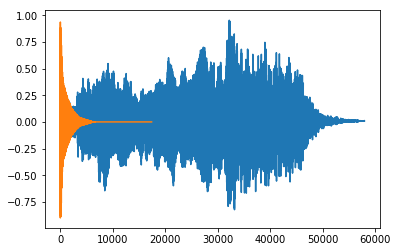

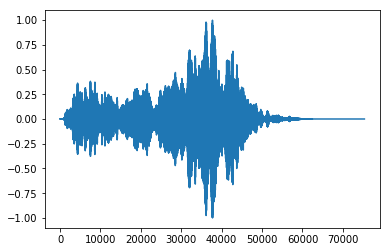

In [2]:
# Load the data and calculate the time of each sample
e_data, e_samplerate  = librosa.load('elefante.wav')
b_data, b_samplerate = librosa.load('Garrafa.wav')

print(e_samplerate)

r_data = np.convolve(e_data, b_data)
r_data /= np.max(np.abs(r_data),axis=0)


plt.plot(e_data)
plt.plot(b_data)
plt.show()
plt.plot(r_data)
librosa.output.write_wav('elefante_na_garrafa.wav', r_data, e_samplerate)

In [3]:
import IPython.display as ipd
ipd.Audio('elefante_na_garrafa.wav') # load a local WAV file

# Project Solution

## 1 Introduction

In [13]:
# Simulate recording of impulse response 
# h[k]: Real impulse response
# w[k]: White noise used to excite impulse response 
# n[k]: White measurement noise (var=0.01)
# r[k] = w[k] ∗ h[k] + n[k].
h, samplerate = librosa.load('Garrafa.wav')
h /= np.max(np.abs(h),axis=0)

def make_measurement(h, num_samples=20000):
    print(samplerate)
    w = np.random.normal(0, 1, size=num_samples)

    n_var=0.01
    n = np.random.normal(0, np.sqrt(n_var), size=num_samples)
#     plt.plot(n)
#     plt.show()

    r = scipy.signal.convolve(w, h) 
    # r = r/sum(h)
    # r /= np.max(np.abs(r),axis=0)
    # r = r*(1/num_samples)
    # r = r[num_samples-1:]

#     plt.plot(r)

    print(np.var(n))
    # plt.plot(r)

    librosa.output.write_wav('r_simulation.wav', r, samplerate)
    wavfile.write('r_simulation.wav', samplerate, r)
    return w, r

In [ ]:
import IPython.display as ipd
ipd.Audio('r_simulation.wav') # load a local WAV file

In [7]:
def estimation_error(estimation, original):
    return np.sum((estimation - original)**2)/np.sum(original**2)

# print(estimation_error(r, h))

## 2 Correlation Estimator

22050
0.010060970477672338


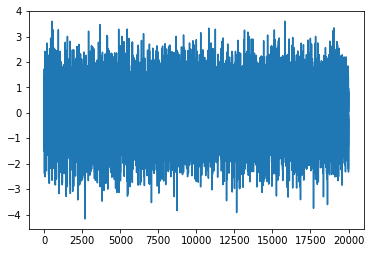

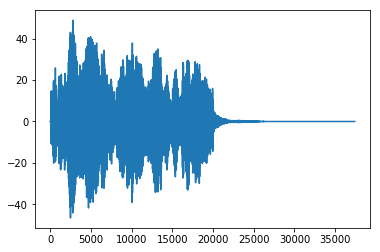

In [145]:
num_samples=20000
w, r = make_measurement(h, num_samples)
plt.plot(w)
plt.show()
plt.plot(r)


0.016870712188327378
Estimation error = 0.6446959262689328


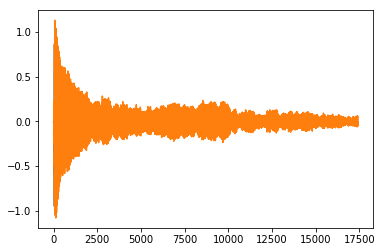

In [143]:
#METHOD 1
ro = np.convolve(r, w[::-1])/len(w)
ro = ro[num_samples-1:num_samples+len(h)-1]
plt.plot(h)
plt.plot(ro)
print(np.var(ro))
wavfile.write('ro.wav', samplerate, ro)
ipd.Audio('ro.wav') # load a local WAV file
print("Estimation error = {}".format(estimation_error(ro, h)))

[ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800
 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900]


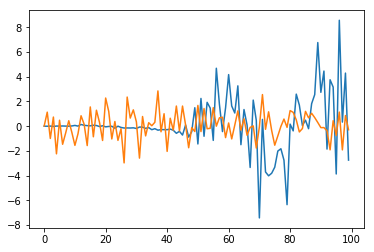

1.2515005499611564e-06
Estimation error = 1.0000730420902055


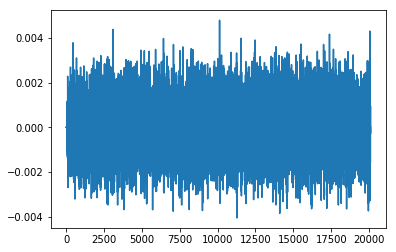

In [141]:
#METHOD 2
sub_sample=100
indices = np.arange(sub_sample, 40*sub_sample, sub_sample)
print(indices)

r_list = np.split(r, indices)
w_list = np.split(w, indices)


# for i in range(len(r_list)):
#     print(i)

i=0
plt.plot(r_list[i])
plt.plot(w_list[i])
plt.show()

ro = np.convolve(r_list[i], w[::-1])/len(w)
plt.plot(ro)

ro = ro[sub_sample-1:sub_sample+len(h)-1]
print(np.var(ro))
wavfile.write('ro.wav', samplerate, ro)
ipd.Audio('ro.wav') # load a local WAV file
print("Estimation error = {}".format(estimation_error(ro, h)))
    

